In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

# Aktualizacja parametrów rc, aby korzystać z LaTeX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath,amsfonts,amssymb}"
})

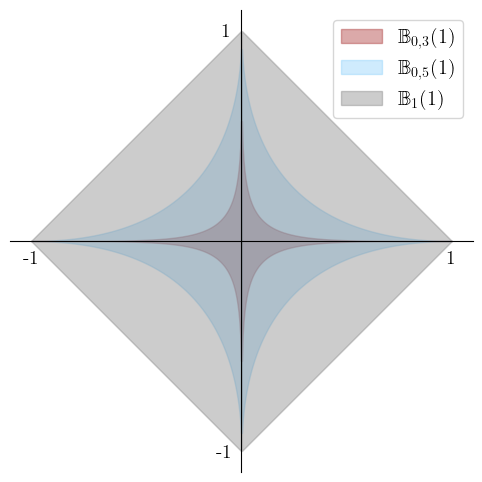

In [3]:
# Funkcja do generowania granicy dla podanego q i R_q
def generate_boundary(q, R_q, resolution=500):
    # Generowanie wartości x w zadanym zakresie
    x = np.linspace(-R_q**(1/q), R_q**(1/q), resolution)
    # Obliczanie wartości y na podstawie równania
    y = np.sign(x) * (R_q - np.abs(x)**q)**(1/q)
    return x, y

# Ustawienie figury i osi
fig, ax = plt.subplots(figsize=(6, 6))

# Definicja parametrów dla różnych kul
params = [
    {"q": 0.3, "R_q": 1, "color": "brown", "label": r"$\mathbb{B}_{0,3}(1)$"},
    {"q": 0.5, "R_q": 1, "color": "lightskyblue", "label": r"$\mathbb{B}_{0,5}(1)$"},
    {"q": 1, "R_q": 1, "color": "gray", "label": r"$\mathbb{B}_{1}(1)$"},
]

# Generowanie i rysowanie kul
for param in params:
    q, R_q = param["q"], param["R_q"]
    color, label = param["color"], param["label"]
    
    # Granica górna
    x_upper, y_upper = generate_boundary(q, R_q)
    # Granica dolna (wartości ujemne y)
    _, y_lower = generate_boundary(q, R_q)
    y_lower = -y_lower
    
    # Wypełnienie obszaru pomiędzy granicami
    ax.fill_between(x_upper, y_lower, y_upper, color=color, alpha=0.4, label=label)

# Dodanie legendy
ax.legend(fontsize=14.5)

# Ustawienie osi
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Ustawienie ograniczeń i zwiększenie rozmiaru czcionki 
ax.set_xticks([-1, 1])
ax.set_xticklabels([-1, 1], fontsize=14)
ax.set_yticks([-1, 1])
ax.set_yticklabels([-1, 1], fontsize=14)
ax.set_aspect('equal', adjustable='box')

os.makedirs("zdjecia_symulacji", exist_ok=True)
plt.savefig("zdjecia_symulacji/kula_lq_R2_1.svg", format="svg", bbox_inches='tight', pad_inches=0)

plt.show()

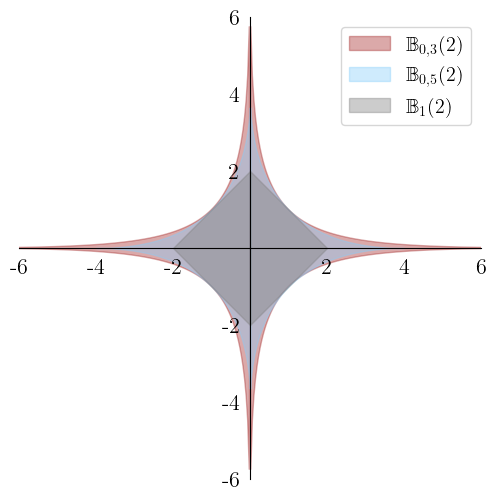

In [4]:
# Funkcja do generowania granicy dla podanego q i R_q
def generate_boundary(q, R_q, resolution=500):
    x = np.linspace(-R_q**(1/q), R_q**(1/q), resolution)
    y = np.sign(x) * (R_q - np.abs(x)**q)**(1/q)
    return x, y

# Ustawienie figury i osi
fig, ax = plt.subplots(figsize=(6, 6))

# Definicja parametrów dla różnych kul
params = [
    {"q": 0.3, "R_q": 2, "color": "brown", "label": r"$\mathbb{B}_{0,3}(2)$"},
    {"q": 0.5, "R_q": 2, "color": "lightskyblue", "label": r"$\mathbb{B}_{0,5}(2)$"},
    {"q": 1, "R_q": 2, "color": "gray", "label": r"$\mathbb{B}_{1}(2)$"},
]

# Generowanie i rysowanie kul
for param in params:
    q, R_q = param["q"], param["R_q"]
    color, label = param["color"], param["label"]
    
    # Granica górna
    x_upper, y_upper = generate_boundary(q, R_q)
    # Granica dolna (wartości ujemne y)
    _, y_lower = generate_boundary(q, R_q)
    y_lower = -y_lower
    
    # Wypełnienie obszaru pomiędzy granicami
    ax.fill_between(x_upper, y_lower, y_upper, color=color, alpha=0.4, label=label)

# Dodanie legendy
ax.legend(fontsize=14.5)

# Ustawienie osi
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Ustawienia ograniczeń osi i ich etykiet
ax.set_xlim(-6, 6) 
ax.set_ylim(-6, 6) 

# na osiach bez wartości 0
xticks = [-6, -4, -2, 2, 4, 6]  
yticks = [-6, -4, -2, 2, 4, 6] 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=16)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=16)

ax.set_aspect('equal', adjustable='box')

os.makedirs("zdjecia_symulacji", exist_ok=True)
plt.savefig("zdjecia_symulacji/kula_lq_R2_2.svg", format="svg", bbox_inches='tight', pad_inches=0)

plt.show()

In [5]:
def generate_3d_boundary(q, R_q, resolution=100):
    x = np.linspace(-1, 1, resolution)  
    y = np.linspace(-1, 1, resolution) 
    x, y = np.meshgrid(x, y)
    
    # Obliczanie wartości z na podstawie równania |x|^q + |y|^q + |z|^q = R_q
    z_squared = R_q - np.abs(x)**q - np.abs(y)**q
    z_squared[z_squared < 0] = np.nan  
    z = np.power(z_squared, 1/q)
    return x, y, z


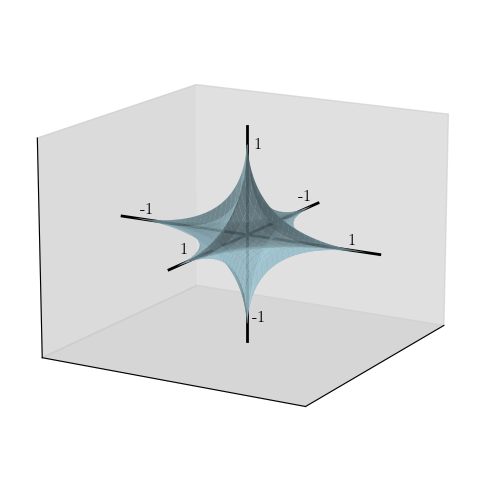

In [6]:

# Parametry
q = 0.5
R_q = 1

# Generowanie zbioru
resolution = 500
x, y, z = generate_3d_boundary(q, R_q, resolution)

# Tworzenie wykresu 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Rysowanie powierzchni dodatniej i ujemnej (dla symetrii wzdłuż osi Z)
ax.plot_surface(x, y, z, color='lightblue', alpha=0.7, edgecolor='none')  # Górna połowa
ax.plot_surface(x, y, -z, color='lightblue', alpha=0.7, edgecolor='none')  # Dolna połowa

# Rysowanie osi na 0
ax.plot([-1, 1], [0, 0], [0, 0], color='black', linewidth=2)  # Oś X
ax.plot([0, 0], [-1, 1], [0, 0], color='black', linewidth=2)  # Oś Y
ax.plot([0, 0], [0, 0], [-1, 1], color='black', linewidth=2)  # Oś Z

# Dodawanie etykiet 1 i -1 na osiach
ax.text(0.8, 0, 0.08, '1', color='black', fontsize=12, ha='center')  
ax.text(-0.8, 0, 0.08, '-1', color='black', fontsize=12, ha='center') 
ax.text(0, 0.8, 0.05, '1', color='black', fontsize=12, ha='center')  
ax.text(0, -0.8, 0.05, '-1', color='black', fontsize=12, ha='center')  
ax.text(0, 0.09, 0.8, '1', color='black', fontsize=12, ha='center')  
ax.text(0, 0.09, -0.8, '-1', color='black', fontsize=12, ha='center') 

ax.xaxis.set_pane_color((0.8, 0.8, 0.8, 0.6)) 
ax.yaxis.set_pane_color((0.8, 0.8, 0.8, 0.7)) 
ax.zaxis.set_pane_color((0.8, 0.8, 0.8, 0.8))  

# Ustawienia zakresu osi
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Usuwanie etykiet osi
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Ustawienia widoku
elevation_angle = 15 
azimuth_angle = 30 
ax.view_init(elev=elevation_angle, azim=azimuth_angle)

plt.savefig("zdjecia_symulacji/kula_lq_R3_1.svg", format="svg", bbox_inches='tight', pad_inches=0)

plt.show()

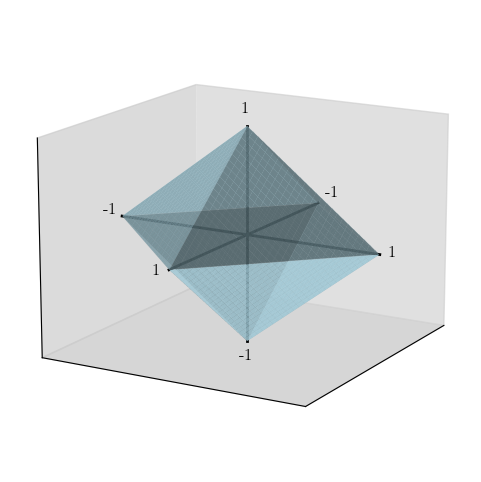

In [7]:

# Parametry
q = 1
R_q = 1

# Generowanie zbioru
resolution = 500
x, y, z = generate_3d_boundary(q, R_q, resolution)

# Tworzenie wykresu 
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Rysowanie powierzchni dodatniej i ujemnej (dla symetrii wzdłuż osi Z)
ax.plot_surface(x, y, z, color='lightblue', alpha=0.7, edgecolor='none')  # Górna połowa
ax.plot_surface(x, y, -z, color='lightblue', alpha=0.7, edgecolor='none')  # Dolna połowa

# Rysowanie osi na 0
ax.plot([-1, 1], [0, 0], [0, 0], color='black', linewidth=2)  # Oś X
ax.plot([0, 0], [-1, 1], [0, 0], color='black', linewidth=2)  # Oś Y
ax.plot([0, 0], [0, 0], [-1, 1], color='black', linewidth=2)  # Oś Z

# Dodawanie etykiet 1 i -1 na osiach
ax.text(1.15, 0, 0, '1', color='black', fontsize=12, ha='center')  
ax.text(-1.2, 0, 0, '-1', color='black', fontsize=12, ha='center') 
ax.text(0, 1.1, 0, '1', color='black', fontsize=12, ha='center')  
ax.text(0, -1.1, 0, '-1', color='black', fontsize=12, ha='center') 
ax.text(-0.03, -0.03, 1.1, '1', color='black', fontsize=12, ha='center')  
ax.text(-0.03, -0.03, -1.2, '-1', color='black', fontsize=12, ha='center') 

# Ustawienie koloru 
ax.xaxis.set_pane_color((0.8, 0.8, 0.8, 0.6)) 
ax.yaxis.set_pane_color((0.8, 0.8, 0.8, 0.7)) 
ax.zaxis.set_pane_color((0.8, 0.8, 0.8, 0.8))  

# Ustawienia zakresu osi
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Usuwanie etykiet osi
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Ustawienia widoku 
elevation_angle = 15  
azimuth_angle = 30   
ax.view_init(elev=elevation_angle, azim=azimuth_angle)

plt.savefig("zdjecia_symulacji/kula_lq_R3_2.svg", format="svg", bbox_inches='tight', pad_inches=0)

plt.show()